In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set("".join(words))))
stoi = { s: i+1 for i,s in enumerate(chars) }
stoi['.'] = 0
itos = { i: s for s, i in stoi.items() }
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:

block_size = 3

X = []
Y = []

for w in words[:5]:
    
    print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
C = torch.randn((27, 2)) # cram our lookup table into a 2-dimensional embedding

In [9]:
C[5]

tensor([-0.4804,  0.3093])

In [10]:
# for every one of our 32 input vectors, we retrieve the "embedding" vector
C[X].shape

torch.Size([32, 3, 2])

In [11]:
X[13,2]

tensor(1)

In [12]:
C[X][13,2]

tensor([-0.2347,  0.1654])

In [13]:
C[1]

tensor([-0.2347,  0.1654])

In [14]:
emb = C[X]

In [15]:
# we have 6 weights, 3 input vectors x 2-dimensional embeddings, and variable neurons (100)
W1 = torch.randn((6, 100)) 
b1 = torch.randn(100)

In [16]:
# we want: emb @ W1 + b1
# but we can't multiply (emb is 32x3x2 while W1 is 6x100)
# to solve, we can concatenate the three embeddings to turn it into 6x2
emb[:, 0, :].shape,  emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([32, 2]), torch.Size([32, 2]), torch.Size([32, 2]))

In [17]:
torch.cat([emb[:, 0, :],  emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [18]:
torch.cat(torch.unbind(emb, 1), 1).shape # this is superior because it allows for variable block size.

torch.Size([32, 6])

In [19]:
a = torch.arange(18)

In [20]:
a.shape

torch.Size([18])

In [21]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [22]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [23]:
# be careful with broadcasting in the plus
# 32 x 100
#  ? x 100 // this works for us, but it's 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # -1 leads pytorch to infer what is going on

In [24]:
h # this is our hidden intermediate state

tensor([[ 1.0000,  0.9724, -0.9912,  ..., -0.6321,  0.9824,  0.2626],
        [ 0.9998,  0.5352, -0.9604,  ...,  0.5657,  0.9799,  0.7206],
        [ 0.8837,  0.1016, -0.0347,  ...,  0.9765,  0.7912, -0.9095],
        ...,
        [-0.7242, -0.7573,  0.1737,  ...,  0.0208, -0.3492, -0.8100],
        [-0.7385, -0.9929, -0.9966,  ..., -0.8621, -0.9727,  0.2868],
        [-0.8118,  0.9639, -0.9560,  ..., -0.8022, -0.1628, -0.8999]])

In [25]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [26]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [27]:
counts = logits.exp()

In [28]:
probs = counts / counts.sum(1, keepdims=True)

In [29]:
probs[0].sum()

tensor(1.)

In [30]:
probs[torch.arange(32), Y] # get the probabilities of the character in the sequence

tensor([7.4552e-03, 2.1012e-10, 1.3663e-07, 3.5765e-07, 3.2790e-08, 3.1065e-06,
        2.9107e-06, 5.6731e-13, 9.3770e-04, 2.0105e-14, 1.0627e-05, 9.9524e-11,
        9.6331e-01, 4.6532e-04, 1.2051e-02, 3.2398e-08, 8.1935e-10, 5.5805e-16,
        1.2381e-07, 3.8409e-01, 5.2435e-07, 2.3641e-07, 9.0516e-05, 2.8423e-02,
        5.9912e-17, 1.3429e-09, 5.8637e-09, 4.4681e-05, 2.8420e-06, 3.6046e-11,
        1.5731e-05, 1.4445e-10])

In [31]:
loss = F.cross_entropy(logits, Y) # this does the same thing as the whole logits.exp() => counts => probs

In [73]:
loss

tensor(2.9071, grad_fn=<NllLossBackward0>)

In [74]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [146]:
# okay, so step by step...

# Step 1: prepare our dataset...
context_length = 3

def build_dataset(words):
    X = []
    Y = []
    for w in words:
        context = [0] * context_length
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)    
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Ydte = build_dataset(words[n2:])

# Step 2: prepare our neural network...
emb_size = 2
g = torch.Generator().manual_seed(42)
C = torch.randn((27, emb_size), generator=g) # create a random lookup table, C

# we have 3 emb weights, 3 input vectors x emb_size-dimensional embeddings, and variable neurons (100)
for num_neurons in [100]:
    W1 = torch.randn((context_length * emb_size, num_neurons), generator=g) 
    b1 = torch.randn(num_neurons, generator=g)

    # output neurons
    W2 = torch.randn((num_neurons, 27), generator=g)
    b2 = torch.randn(27, generator=g)

    parameters = [C, W1, b1, W2, b2]
    for p in parameters:
        p.requires_grad = True

    # stats
    lri = []
    lossi = []
    stepi = []

    for i in range(100000):
        # mini-batch construct
        # mini-batch means that we are only optimizing on a subset of our data, so the
        # gradient isn't 100% correct. it will fluctuate slightly, but in general it will work quite well
        ix = torch.randint(0, Xtr.shape[0], (32,), generator=g)

        # forward pass
        emb = C[Xtr[ix]]
        h = torch.tanh(emb.view(-1, context_length * emb_size) @ W1 + b1)
        logits = h @ W2 + b2

        # loss function + back-propagation
        loss = F.cross_entropy(logits, Ytr[ix])

        # backward pass
        for p in parameters:
            p.grad = None
        loss.backward()


        # adjust
        lr = 0.01 # lrs[i]
        for p in parameters:
            p.data += -lr * p.grad

        # track stats
        stepi.append(i)
        lossi.append(loss.log10().item())

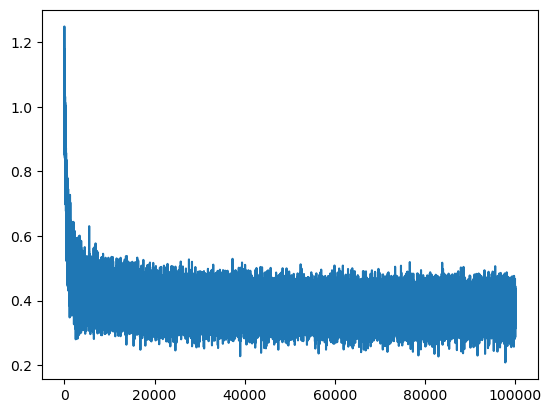

In [147]:
plt.plot(stepi, lossi)

In [148]:
# dev loss
emb = C[Xdev]
h = torch.tanh(emb.view(-1, context_length * emb_size) @ W1 + b1)
logits = h @ W2 + b2

# loss function + back-propagation
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.3842, grad_fn=<NllLossBackward0>)


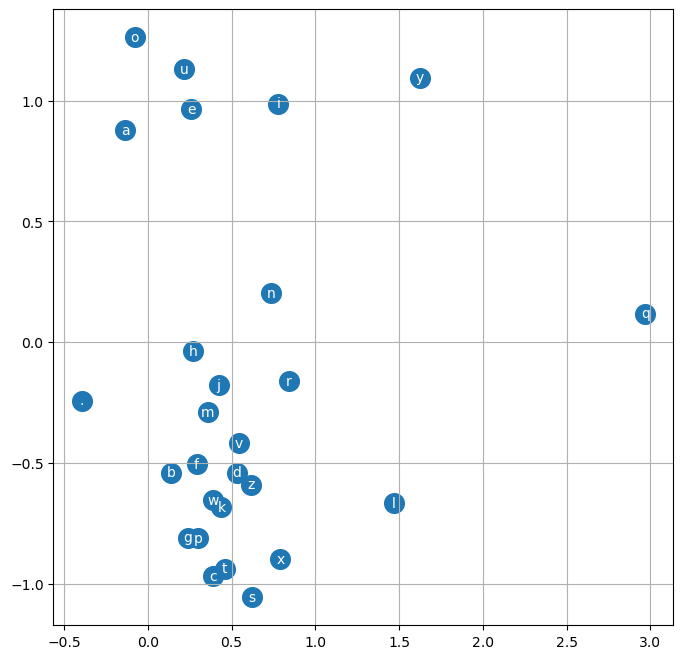

In [105]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

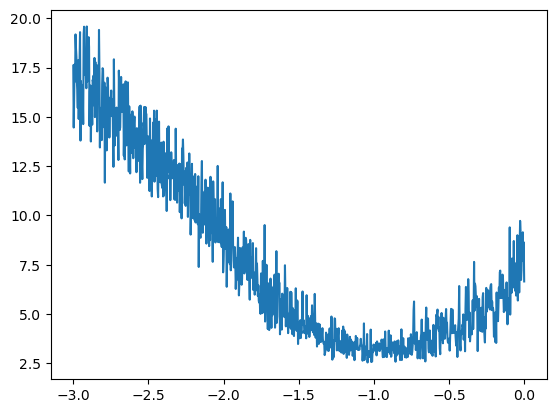

In [80]:
plt.plot(lri, lossi)

In [93]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2

# loss function + back-propagation
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.323906660079956

In [94]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2

# loss function + back-propagation
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.323349714279175

In [44]:
torch.randint(0, X.shape[0], (32,))

tensor([213510,  25684, 221977, 154729,  35731, 195980, 201080, 198896,  60356,
         68142, 123315, 175909, 217977,  72316, 147194,  50779, 121806, 103178,
         34646, 144261,   6068,  16013, 121241,  43524, 223813, 224012,  52074,
         81398,  45684, 135300,  49306,  14268])

In [ ]:
# training split, dev/validation split, test split
# used to train params, used to test hyperparams, used to test the model
# 80%, 10%, 10%


In [152]:
for _ in range(20):
    out = []
    context = [0] * context_length
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print("".join(itos[i] for i in out))

sarison.
aanaleng.
daelyndaush.
lacindah.
jye.
tomitlin.
aava.
janein.
nana.
nyy.
rostena.
barlisheysriy.
koyd.
kahdedc.
iate.
makel.
nalirie.
maoan.
ann.
milat.
